## Business understanding

Customer personality analysis - dataset was downloaded from:  
https://www.kaggle.com/imakash3011/customer-personality-analysis

### Dataset description

 -- Taken directly from the link above -- 

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### Questions we will try to solve

1. What is the "average" customer that we are the most likely to attract in each sales campaign ?  
2. What is the preferred sale channel per product ? 
3. What is the profile of those customers that prefer online or catalog shopping / shopping directly in stores ?  
4. What are the consumer behaviors/characteristics with the highest importance when predicting customer's yearly income ? 

## Data understanding

In this section, we get to know the data we are handling. We can see which variables are quantitative and which ones are categorical. In the same way, we explore if there are any missing values.

In [1]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Converting the csv file into a dataframe 
df = pd.read_csv('marketing_campaign.csv',delimiter='\t')
des_df = pd.read_csv('Column_description.csv',delimiter=':')
des_df.set_index('Column', inplace=True)
# Getting a glimpse of the data
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
print(f"The size of the data set is: \n{df.shape}")

The size of the data set is: 
(2240, 29)


In [3]:
print(f"The number of columns in the description is: {des_df.shape[0]}")
des_df.head(30) 

The number of columns in the description is: 27


,Description
Column,
ID,Customer's unique identifier
Year_Birth,Customer's birth year
Education,Customer's education level
Marital_Status,Customer's marital status
Income,Customer's yearly household income
Kidhome,Number of children in customer's household
Teenhome,Number of teenagers in customer's household
Dt_Customer,Date of customer's enrollment with the company
Recency,Number of days since customer's last purchase


In [4]:
# Understanding data types 
#print(df.dtypes)
# Extracting categorical columns
cat_col = df.select_dtypes(include=['object']).columns
print(f"\nCategorical columns: \n{cat_col}")


Categorical columns: 
Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')


In [5]:
# Exploring if there are missing values in the dataframe and the columns that contain them
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


## Data preparation

### Dealing with missing values

We will delete those rows that does not contain information about income. We are also going to delete those columns which are not described in the file: Column_description.csv  

In [6]:
# Getting rid of those columns with no description available
col_diff = list((set(df.columns))^(set(des_df.index)))
df.drop(columns=col_diff, inplace=True)

In [7]:
# Getting rid of those rows where 'Income' is null
df = df.dropna(subset=['Income'])
# Verifying that we do not have any other missing value
print(f"Number of missing values in the dataset: {np.sum(df.isnull().sum())}")


Number of missing values in the dataset: 0


### Cleaning categorical columns

In [8]:
# Cleaning the categorical columns
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [9]:
df = df.replace({'YOLO': 'Other', 'Absurd': 'Other', 'Alone':'Single'})
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      474
Divorced    232
Widow        76
Other         4
Name: Marital_Status, dtype: int64

In [10]:
df['Education'].value_counts()
# No need to clean

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

## Data modelling 

### Campaign analysis

In [11]:
camp_col = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']

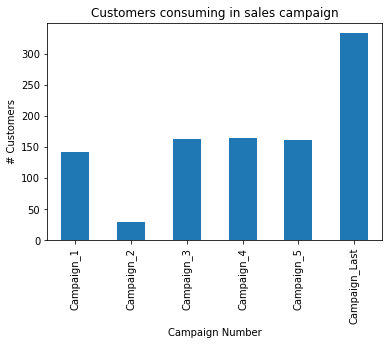

In [12]:
# Histogram of the total numeber of customers per campaign (a single customer can attend multiple campaigns)
campaign_impact = df[camp_col]
campaign_impact = campaign_impact.rename(columns={'AcceptedCmp1':'Campaign_1','AcceptedCmp2':'Campaign_2','AcceptedCmp3':'Campaign_3','AcceptedCmp4':'Campaign_4','AcceptedCmp5':'Campaign_5','Response':'Campaign_Last'}, errors="raise")
cts_per_campaign = campaign_impact.sum()
cts_per_campaign.plot.bar(title='Customers consuming in sales campaign', xlabel='Campaign Number', ylabel='# Customers')

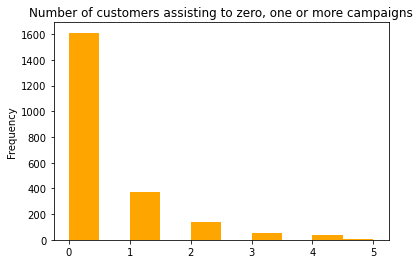

In [13]:
# Number of campaigns at which the customers in the study assisted 
campaign_nb_per_cst = campaign_impact.sum(axis=1)
campaign_nb_per_cst.plot.hist(title='Number of customers assisting to zero, one or more campaigns', color='orange')

In [14]:
# We are going to analyze just those customers participating into a single sales campaign
camp1 = df.loc[(df['AcceptedCmp1']==1) & (df['AcceptedCmp2']==0) & (df['AcceptedCmp3']==0) & (df['AcceptedCmp4']==0) & (df['AcceptedCmp5']==0) & (df['Response']==0)]
camp2 = df.loc[(df['AcceptedCmp1']==0) & (df['AcceptedCmp2']==1) & (df['AcceptedCmp3']==0) & (df['AcceptedCmp4']==0) & (df['AcceptedCmp5']==0) & (df['Response']==0)]
camp3 = df.loc[(df['AcceptedCmp1']==0) & (df['AcceptedCmp2']==0) & (df['AcceptedCmp3']==1) & (df['AcceptedCmp4']==0) & (df['AcceptedCmp5']==0) & (df['Response']==0)]
camp4 = df.loc[(df['AcceptedCmp1']==0) & (df['AcceptedCmp2']==0) & (df['AcceptedCmp3']==0) & (df['AcceptedCmp4']==1) & (df['AcceptedCmp5']==0) & (df['Response']==0)]
camp5 = df.loc[(df['AcceptedCmp1']==0) & (df['AcceptedCmp2']==0) & (df['AcceptedCmp3']==0) & (df['AcceptedCmp4']==0) & (df['AcceptedCmp5']==1) & (df['Response']==0)]
camp_last = df.loc[(df['AcceptedCmp1']==0) & (df['AcceptedCmp2']==0) & (df['AcceptedCmp3']==0) & (df['AcceptedCmp4']==0) & (df['AcceptedCmp5']==0) & (df['Response']==1)]

In [15]:
# Analyzing customers consuming in a single sales campaign
campaigns = [camp1, camp2, camp3, camp4, camp5, camp_last]

def consolidate_cst_data(col):
    '''
    INPUT
    col - pandas series to be analyzed 
    
    OUTPUT
    returns the Mode of the input data if the dtype is 'object' or the Mean otherwise.
    '''
    
    if col.dtype == 'object':
        return col.mode()[0]
    else:
        return col.mean()
    
res = []
for campaign in campaigns: 
    res.append(campaign.apply(consolidate_cst_data, axis=0).tolist())

campaign_cons = pd.DataFrame(res, columns=df.columns, index=['C1','C2','C3','C4','C5','Last'])
campaign_cons

# Dropping useless columns
campaign_cons.drop(columns=camp_col, inplace=True)
campaign_cons.drop(columns=['ID'])

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
C1,1963.153846,Graduation,Married,73785.205128,0.153846,0.307692,03-06-2013,59.333333,597.820513,47.641026,390.076923,97.307692,55.948718,79.282051,1.743590,6.051282,5.435897,8.461538,3.743590,0.000000
C2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3,1971.391892,Graduation,Married,43931.054054,0.540541,0.581081,02-10-2013,51.986486,271.351351,15.513514,90.932432,26.500000,14.445946,62.621622,2.310811,4.040541,2.756757,4.405405,6.337838,0.000000
C4,1963.902778,Graduation,Married,60343.263889,0.166667,0.791667,10-11-2012,53.722222,565.958333,20.638889,146.805556,29.027778,20.000000,35.444444,2.833333,5.500000,2.819444,7.916667,5.555556,0.000000
C5,1963.657895,Graduation,Married,81194.447368,0.000000,0.131579,12-05-2013,56.789474,781.526316,60.526316,494.842105,80.631579,71.763158,79.394737,1.026316,5.236842,6.131579,8.868421,2.289474,0.000000
Last,1968.554795,Graduation,Single,50747.945205,0.506849,0.369863,09-11-2012,31.972603,303.760274,33.383562,235.102740,42.746575,32.280822,50.561644,2.931507,4.602740,3.068493,5.369863,6.102740,0.006849


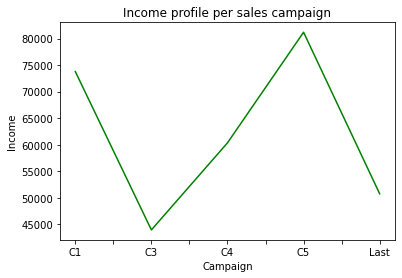

In [16]:
# Income profile per sales campaign 
campaign_cons['Income'].dropna().plot.line(color='green', xlabel='Campaign', ylabel='Income', title='Income profile per sales campaign')

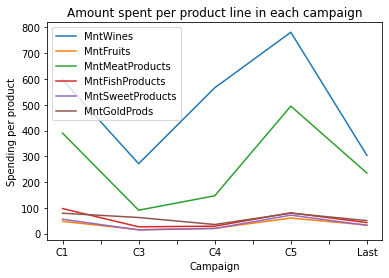

In [17]:
# Amount spent per product line in each campaign 
prod_columns = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
campaign_cons[prod_columns].dropna().plot.line(xlabel='Campaign', ylabel='Spending per product', title="Amount spent per product line in each campaign")    

#### Conclusion - Campaign analysis 

What is the "average" customer that we are the most likely to attract in each sales campaign ?

*Camp 1 - Camp 5*: They attract those customers with the highest income. The main sales channel are physical stores, while the most consumed products are wine and meat.

*Camp 2*: The is not enough information about customers attending only to Campaign 2.

*Camp 3 - Camp 4*: Low to medium income customers. Physical stores continue being the preferred channel, and meat and wine the preferred products.

*Last campaign*: Low income customers, with the particular characteristic of having the lowest recency (they are continually buying). The sales channels are more evenly distributed.


### Sales channels 

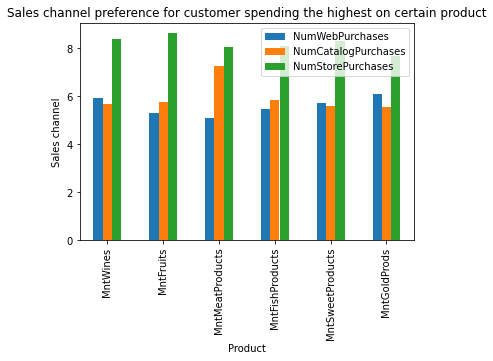

In [18]:
pct_prod = 0.05  # Proportion of the highest customers spending in a product to be analyzed
prod_col = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
channel_col = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']

res = []
for col in prod_col:
    highest_expenses = df.sort_values(by=[col], ascending=False)[:int(df.shape[0]*pct_prod)]
    res.append(highest_expenses.mean()[channel_col].values) 
pref_channels_per_prod = pd.DataFrame(res, columns=channel_col, index=prod_col)   
pref_channels_per_prod.plot.bar(xlabel='Product', ylabel='Sales channel', title='Sales channel preference for customer spending the highest on certain product')
    


#### Conclusion - Sales channel

What is the preferred sale channel per product ?

According the data (and taking into account the top 5% of customer spending the most on different products), the preferred sales channels are the physical stores. We can also see that for **meat** purchases, there is a special preference for buying through a catalog compared to all other products. 



### Customer profile: Online versus catalog and in-store sales

In [19]:
pct_channel = 0.05  # Proportion of the highest customers spending through a specific sales channel
channel_col = ['NumWebPurchases','NumStorePurchases', 'NumCatalogPurchases']

res = []
for channel in channel_col: 
    highest_channels_sales = df.sort_values(by=[channel], ascending=False)[:int(df.shape[0]*pct_channel)]
    res.append(highest_channels_sales.apply(consolidate_cst_data, axis=0).tolist())

channel_cons = pd.DataFrame(res, columns=df.columns, index=channel_col)

# Dropping useless columns
channel_cons.drop(columns=camp_col, inplace=True)
channel_cons.drop(columns=['ID','Year_Birth','Dt_Customer','Complain'], inplace=True)
channel_cons

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
NumWebPurchases,Graduation,Married,63919.836364,0.163636,0.700000,49.009091,678.427273,43.927273,227.336364,56.345455,45.172727,73.927273,3.290909,10.627273,4.209091,8.300000,6.400000
NumStorePurchases,Graduation,Married,70097.163636,0.081818,0.500000,43.409091,634.918182,56.727273,281.336364,74.500000,59.700000,75.090909,2.118182,5.781818,5.009091,12.754545,3.845455
NumCatalogPurchases,Graduation,Married,78136.727273,0.018182,0.272727,50.354545,640.881818,57.818182,475.800000,85.609091,59.581818,82.563636,1.800000,5.236364,10.409091,7.509091,3.027273


#### Conclusion - Customer profile: Online versus catalog and in-store sales

What is the profile of those customers that prefer online or catalog shopping / shopping directly in stores ? 

*Catalog*: The highest-earning households prefer this sales channel. Customers are not really intereseted in buying discounted products. Customers buying through catalog have less children in average at home than those using other channels. 

*Physical store*: Customers in a middle range of salary uses this channel the most. 

*Web*: Customers have the lowest income. Customers tend to visit the only store more than 6 times a week on average, and they have the largest number of kids at home compared to other sales channels.  



### Customer behaviors predicting the highest customer income

#### Creating dummy variables for categorical columns

In [20]:
# Creating dummy variables
cat_col_copy = cat_col.drop('Dt_Customer')  # Remove useless categorical column
cat_df = df

for col in cat_col_copy: 
    cat_df = pd.concat([cat_df.drop([col], axis=1),pd.get_dummies(cat_df[col],prefix=col)], axis=1)

#### Fitting a linear model 

In [38]:
y = cat_df['Income']
X = cat_df.drop(['Income','ID','Year_Birth','Dt_Customer','Marital_Status_Other'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) 

lm_model = LinearRegression(normalize=True) # Instantiate model
lm_model.fit(X_train, y_train) # Fit model

y_test_pred = lm_model.predict(X_test)  # Make prediction 
test_score = r2_score(y_test, y_test_pred)  # Get R2

print(f"The value of R2 is {test_score}")

The value of R2 is 0.7582248273323684


#### Understanding linear regression coefficients

In [40]:
coefs_df = pd.DataFrame()
coefs_df['Variable'] = X_train.columns
coefs_df['Coefficients'] = lm_model.coef_
coefs_df['Absolute Coefficients'] = np.abs(lm_model.coef_)
coefs_df = coefs_df.sort_values('Absolute Coefficients', ascending=False)

coefs_df.head(20)

,Variable,Coefficients,Absolute Coefficients
22,Education_Basic,-12661.951504,12661.951504
1,Teenhome,4375.901656,4375.901656
17,AcceptedCmp1,3850.122920,3850.122920
16,AcceptedCmp5,3539.988051,3539.988051
18,AcceptedCmp2,3164.653907,3164.653907
13,NumWebVisitsMonth,-2992.309162,2992.309162
15,AcceptedCmp4,2170.029845,2170.029845
14,AcceptedCmp3,-2109.501215,2109.501215
28,Marital_Status_Single,-2059.945786,2059.945786
0,Kidhome,1699.511647,1699.511647


#### Conclusion - Customer characteristics/behaviors predicting annual income

What are the consumer behaviors/characteristics with the highest importance when predicting customer's yearly income ? 

According to the data, a basic level education is the main factor that can predict a low household income. The sales campaigns a customer participates in can also say a lot about the salary (being the campaign 1 and 5 the ones attracting the highest income customers). We can also see that the number of times a customer visit the web store can be a good sign of loyalty but can also represent a customer with a low income. 